In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# ENVPHYS300: Isostasy and gravity

In this class you will learn:

1) The hypotheses of isostasy.

2) The principles of isostasy (Archimedes principle) and flexural isostasy.

3) The relation of isostasy and the Gravity Anomalies.

4) Examples around the world



# Isostasy and Gravity Anomalies

Isostasy is related to the support of the crust on the upper mantle. In this regard, we can think of the tectonic plates as either pieces of floating material trying to reach buoyant equilibrium, or loads on an elastic sheet. There are **three** models (hypothesis) to explain the process:

   a) Airy-Heiskanen hypothesis
   
   b) Pratt hypothesis
   
   c) Flexural Isostasy
   
On one end, the first two hypotheses account for the forces that sustain the crust as the product of buoyancy forces alone that can be estimated by means of ***Archimedes principle***. The density of the rocks control the way the buoyancy happens.  On the other end, the third hypothesis states that the elastic properties of the crust can also explain the support of the masses above, thus playing also a role in the way loads are distributed.

All of the hypothesis are idealizations, therefore models of limited usefulness.  The true mechanism of isostasy is a combination of the three to some extent, so the truth lies somewhere in the spectrum defined by the three hypothesis.  Which mechanism or model dominates will depend on the geological setting, and that is what concerns us in this exercise.

![Isostasy Mechanisms](Isostasy_cartoon.png)


Since buoyancy depends on density changes, the method of choice is gravimetry or the measurement of gravity variations on the surface of the Earth. In gravimetry, as you may alreday know, we relate the changes of gravity to densities beneath the surface by means of the concept of *gravity anomalies*.

## Archimedes principle

The equations governing the forces on a body contained in a fluid follow *Archimedes' principle*, which states that:

> ***Any object, totally or partially immersed in a fluid, is buoyed up by a force equal to the weight of the fluid displaced by the object.***

![The prism](Archimedes_prism.png)

If you have a block of length $L$ and tranverse area $A$ of density $\rho$ immersed in a fluid of density $\rho_f$, the principle stated above would imply that the force of the weight of the object ($F_W$) will be counteracted by the weight of the fluid the object displaces ($F_B$), or the buoyant force.  In equilibrium, it would be:

$$F_W + F_B = 0$$

$$F_w = m g = \rho V g = \rho L A g$$

where $V$ is the volume of the object and $g$ is the acceleration of gravity.  If we see a portion $h$ of the body over the fluid, the submerged length (h_S) is $L-h$.  Then, thebuoyant force ($F_B$) can be expressed as:

$$F_B = \rho_f (L-h) A g = \rho_f h_S A g$$

by equating $F_W$ and $F_B$ we get:

$$\frac{\rho}{\rho_f}=1-\frac{h}{L}$$

or

$$h=\bigg(1 - \frac{\rho}{\rho_f} \bigg) L$$

or in terms of the submerged length ($h_S$):

$$h_S = \frac{\rho}{\rho_f} L$$

These equations will be applied to the crust and mantle to explain two of the isostatic compensation hypotheses.



In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/f5U63IGmy6Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/home/leo/anaconda3/envs/jrudge/lib/python3.10/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Airy-Heiskanen hypothesis


Two of the hypotheses described above explain the compensation of loads on the crust if we assume they can freely float. Airy wrote (1855):

> "the state of the Earth's crust lying upon the lava may be compared with perfect correctness to the state of a raft of timber floating upon water; in which, if we remark one log whose upper surface floats higher than the upper surfaces of the others, we are certain that its lower surface lies deeper in the water than the lower surfaces of the others" Quoted in A. B. Watts. *Isostasy and Flexure of the Lithosphere, 2001*. 

So you can think of the topographic and bathymetric features of the earth as being supported by their floatability in the upper mantle (asthenosphere).  These features can be modelled as having a single density or a variable density.  

![Topography](Topo_BGI_GMT.jpg)

This floatability would predict either a continuation of the crust into the mantle or a lateral variation of density.  How do we check that, if we as a race have barely drilled to around $12~km$ ($12.262~m$) depth?  

The image below shows this floatability principle, it is in "perfect correctness" with Airy's quote. 

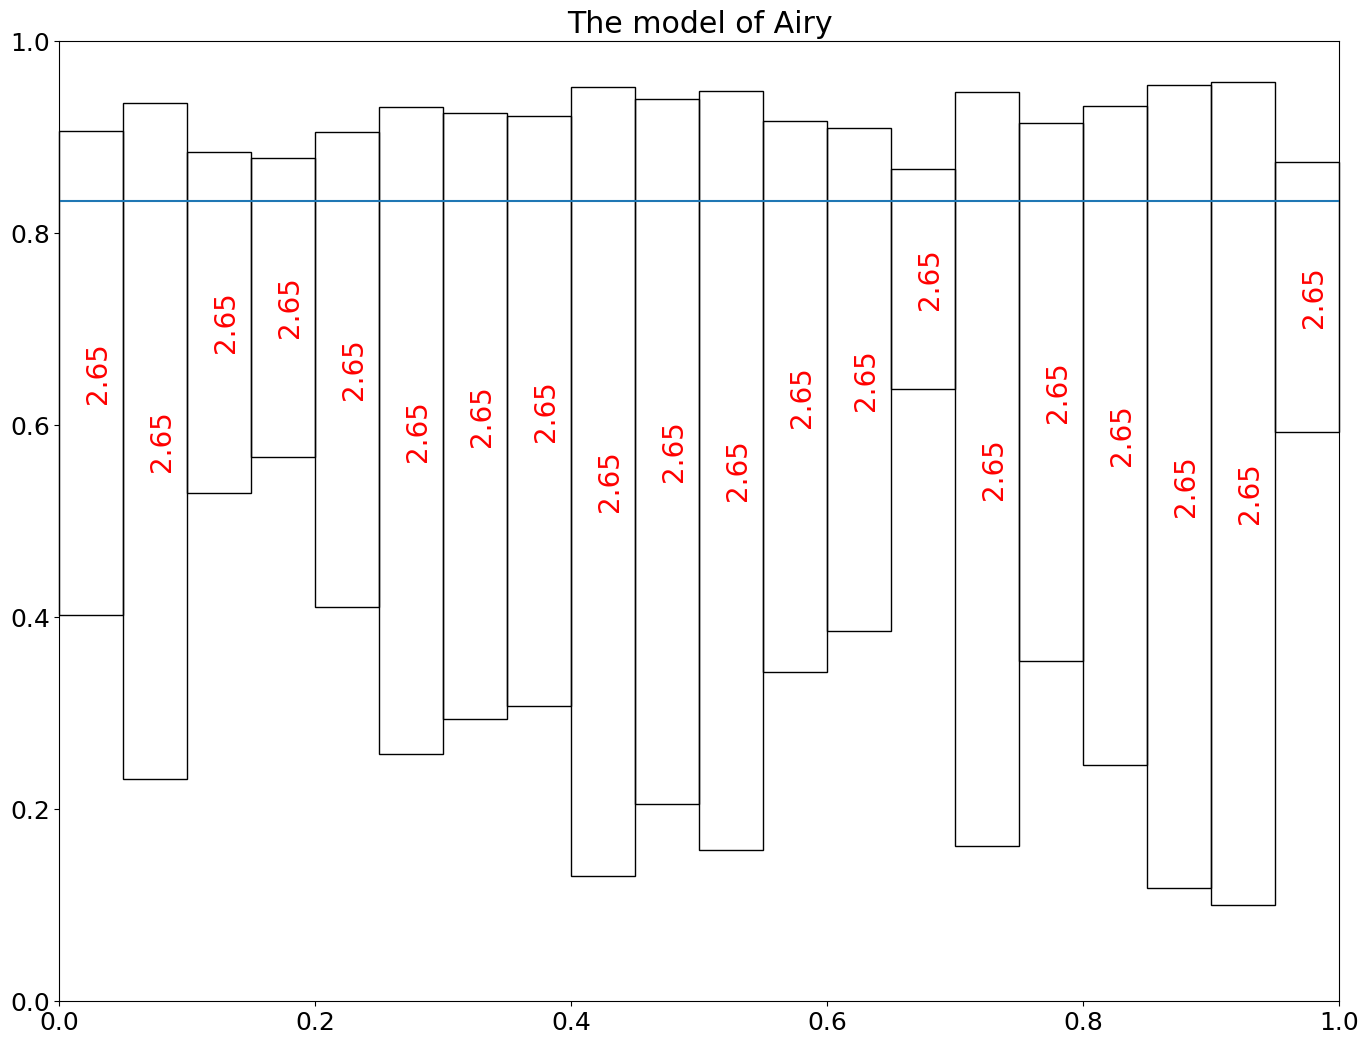

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set default font size for plots:
font = {'size'   : 18}
plt.rc('font',**font)

# build a rectangle in axes coords
left, width = .25, .05
bottom, height = .10, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
rho_p=2.65
rho_m=3.1

L=np.random.uniform(low=0.2, high=0.9, size=(20,))
L_max=np.max(L)
hs_max=L_max*(rho_p/rho_m)
for i in range(0,20):
    left=i*width
    #height=np.append(height,hs*(rho_m/rho_p[i]))
    if L[i]<=L_max:
        b=bottom+hs_max-(L[i]*(rho_p/rho_m))
        p = patches.Rectangle(
            (left, b), width, L[i],
            fill=False, transform=ax.transAxes, clip_on=False
            )

        ax.add_patch(p)
        #Plot the density
        ax.text(left+0.03, b+0.5*L[i], ''+str(np.round(rho_p,decimals=2))+'',
            horizontalalignment='center',
            verticalalignment='center',rotation='vertical',
            fontsize=20, color='red',
            transform=ax.transAxes)  
plt.title('The model of Airy')        
plt.axhline(bottom+hs_max)    
plt.show()

## Pratt's hypothesis


Pratt wrote a 75-page paper, Airy's wrote a 3-page one. He criticized the ideas of Airy based on the paradigms of his time, as we scientist do.  Pratt wrote (1864, 1871):

> "the amount of matter in any vertical column drawn from the surface to a level surface below the crust is now and ever has been, approximately the same in every part of the Earth" Quoted in A. B. Watts. *Isostasy and Flexure of the Lithosphere, 2001*.

If we assume a common level of equilibrium in which the weights of columns are equal, then you get that vertical changes are caused by lateral density changes. The model below illustrates what he meant.  

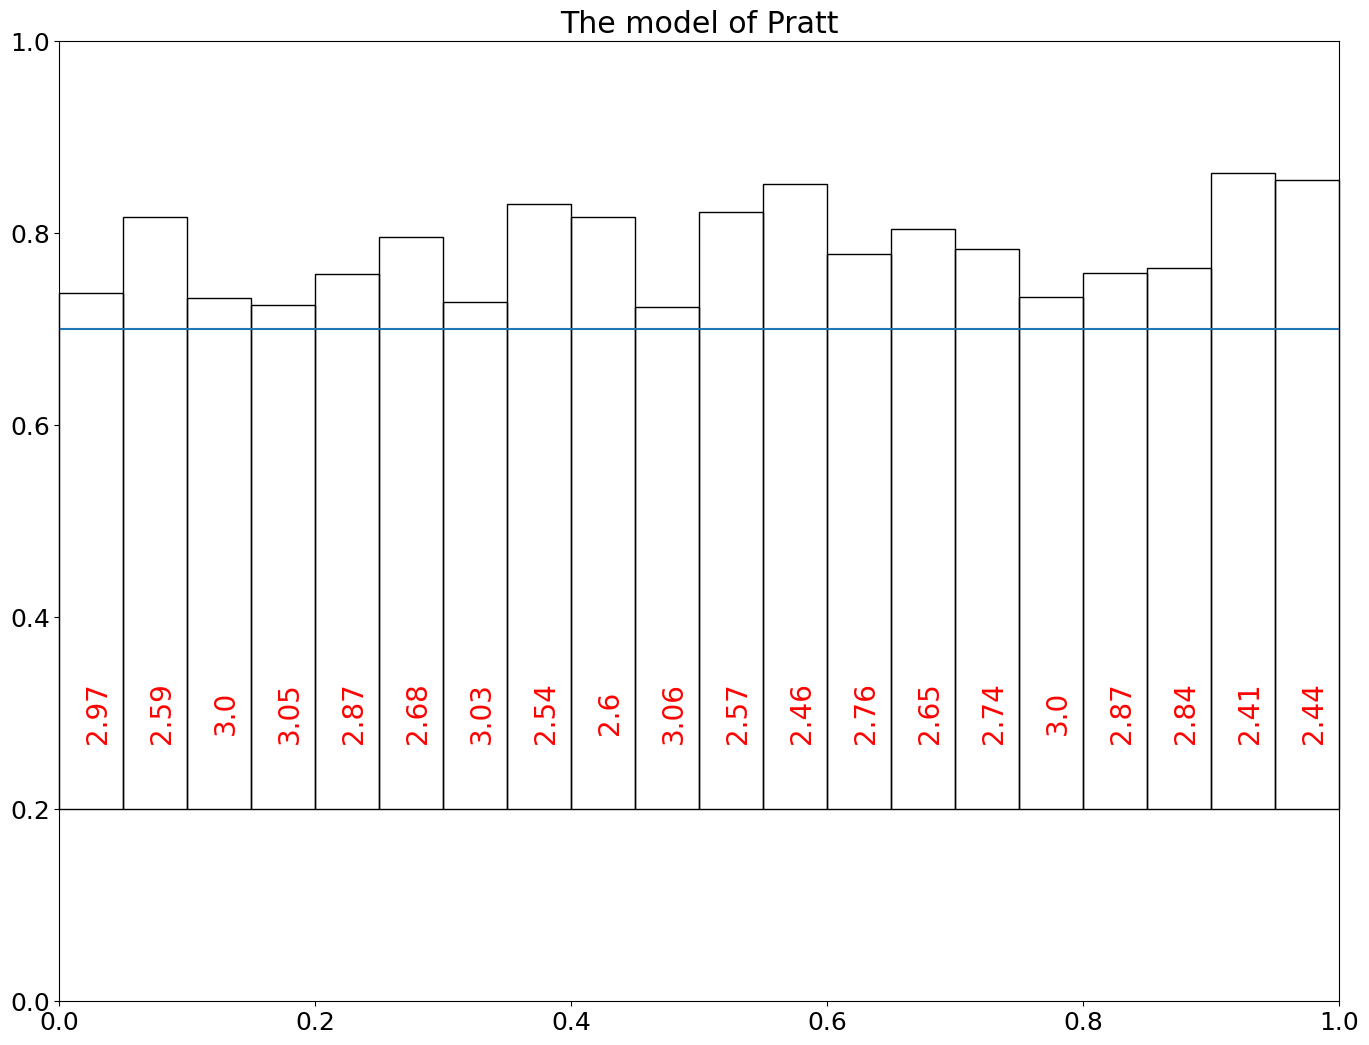

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Set default font size for plots:
font = {'size'   : 18}
plt.rc('font',**font)

# build a rectangle in axes coords
left, width = .25, .05
bottom, height = .20, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
rho_p=np.random.uniform(low=2.4, high=3.1, size=(20,))
rho_m=3.2
hs=0.5
height=[]
for i in range(0,20):
    left=i*width
    height=np.append(height,hs*(rho_m/rho_p[i]))
    p = patches.Rectangle(
        (left, bottom), width, height[i],
        fill=False, transform=ax.transAxes, clip_on=False
        )

    ax.add_patch(p)
    #Plot the density
    ax.text(left+0.03, 0.3, ''+str(np.round(rho_p[i],decimals=2))+'',
        horizontalalignment='center',
        verticalalignment='center',rotation='vertical',
        fontsize=20, color='red',
        transform=ax.transAxes)
plt.title('The model of Pratt')
plt.axhline(bottom+hs)    
plt.show()

## Flexural isostasy

Imagine the crust is like the elastic surface of a trampoline.  If you place a load (heavy object) on that surface it will vertically bend with larger vertical displacements ($z$) closed to the load and smaller ones as the distance ($x$) away from it increases.  The vertical displacement can be modelled in 1D by the following differential equation:

$$D \frac{d^4z}{dx^4}+(\rho_m-\rho_w)zg = P(x)$$

where $P(x)$ is the load as a function of horizontal distance $x$, $g$ is the gravity acceleration, $\rho_m$ and $\rho_w$ are the densities of the asthenosphere and water respectively, and $D$ is called the *flexural rigidity* and it is calculated as:

$$D=\frac{ET^{3}_{e}}{12(1-\nu^2)}$$

where $E$ is the Young's modulus, $\nu$ is the Poisson's ratio, and $T_e$ the thickness of the elastic layer of the lithosphere.  This model is a simplification but serves the purpose to illustrate the main variables involved in the process.

### Where in the world?

1. Large seamounts, Hawaii island chains
2. Foreland basins in continent-continent collisions (Hymalayas,India)
3. Near trenches in oceanic plates (Kuril trench)
4. Post-glacial rebound in Scandinavia and Canada

In the figure below, think of the effect of increasing the thickness of the loaded lithosphere. What happens to the forebulge? See the proportion of the forebulge height to the maximum flexural displacement (depth). That proportion is observed to be around 4%, but remember that our model is a 1D simplification to illustrate the overall elastic behaviour, so take its predictions with a grain of salt.

| Material    | E (GPa)      | $\nu$ (Poisson's ratio) |
| ---       | ---          | ---                     |
| Iron      | 196          | 0.29                    |
| Rubber    | 0.01-0.1     | almost 0.5              |
| Quartz    | 72           | 0.16                    |
| Salt      | 40           | ~0.38                    |
| Diamond      | 1050-1200           | 0.2                    |
| Limestone      | 80           | 0.15-0.3                    |
| Sandstone      | 10-20           | 0.21-0.38                   |
| Shale      | 5-70           | 0.03-0.4                   |
| Gabbro      | 50-100           | 0.2-0.4                   |
| Granite      | ~50           | 0.1-0.25                   |
| Amphibolite      | 50-110           | 0.1-0.33                   |
| Marble      | 50-70           | 0.06-0.25                   |

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Set default font size for plots:
font = {'size'   : 18}
plt.rc('font',**font)

def flexure(Te):
    #Parameters
    g=9.8
    rhom=3300
    rhow=2650
    P=24e9 #Kg
    #D=2e22 #N.m 6e22, 4e23
    #Distance from line weight load 
    x=1000*np.linspace(0,1000,200) #m
    ##D depends on several elastic parameters
    E=6.5e10
    nu=0.25
    #Te=8000
    D=(E*Te**3)/(12*(1-nu**2))
    
    #Factors
    alpha=(4*D/(rhom-rhow)*g)**0.25
    zo=-(P*alpha**3)/(4*D)  #vertical displacement at x=0
    z=zo*np.exp(-x/alpha)*np.cos(x/alpha) 

    plt.figure('Vertical Displacement',figsize=(15,5))
    plt.plot(x*0.001,z)
    plt.xlabel('Distance (Km)'),plt.ylabel('Vertical displacement (m)')
    plt.grid(True)
    plt.show()
    return

def flexure_int(Te):
    #Parameters
    g=9.8
    rhom=3300
    rhow=2650
    P=24e9 #Kg
    #D=2e22 #N.m 6e22, 4e23
    #Distance from line weight load 
    x=1000*np.linspace(0,1000,200) #m
    ##D depends on several elastic parameters
    E=6.5e10
    nu=0.25
    #Te=8000
    D=(E*Te**3)/(12*(1-nu**2))
    
    #Factors
    alpha=(4*D/(rhom-rhow)*g)**0.25
    zo=-(P*alpha**3)/(4*D)  #vertical displacement at x=0
    z=zo*np.exp(-x/alpha)*np.cos(x/alpha) 
    
    #Forebulge height to max. load depth (percentage)
    print('Flexural rigidity :',D)
    print('Forebulge height as percentage of zo: ',100*(np.max(z)/-zo))
        
    fig, ax1 = plt.subplots(figsize=(15,5))

    color = 'tab:red'
    ax1.set_xlabel('Distance (Km)')
    ax1.set_ylabel('z (m)', color=color)
    ax1.plot(x*0.001, z,'.', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('z/zo', color=color)  # we already handled the x-label with ax1
    ax2.plot(x*0.001, -z/zo, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.grid(True)
    plt.show()
    return

plt.close('all')
interactive(flexure_int, Te = (1000,40000,2000),continuous_update=False)



interactive(children=(IntSlider(value=19000, description='Te', max=40000, min=1000, step=2000), Output()), _do…

## A Quick review of Gravity Anomalies 

First things first, what is an anomaly? Long story short, it is the discrepancy between an observed value and a normal expected one.

   > ***Anomaly***
   
   > **(noun)**
   
   > *"Something that deviates from what is standard, normal, or expected."* --Oxford English Dictionary

![Beatles](Beatles.png)

In Geodesy and Geophysics this simple definition becomes:

|           **Geodesy** (shape of the Earth)  |              **Geophysics** (density changes)            |
|---------------------------------------------|----------------------------------------------------------|
|   $\Delta g = g_{geoid}-g_{ellipsoid}$      |   $\Delta g = g_{surface}-g_{ellipsoid\_at\_surface}$    |


We will work with the geophysical definition since our purpose is to understand lateral density changes.  For a good summary of these concepts read Li and Goetze, 2001. The geophysical definition of the gravity anomaly is refered to as ***gravity disturbance*** to differentiate it from the geodesic approach.

From the definition of an anomaly, you can readily see that we are trying to describe the deviations of the observed value of gravity from that of the standard or normal value predicted by the International Gravity Formula at a point of observation on the earth's surface.   

In order to compute that deviation, a previous set of corrections must be applied to the observed value of gravity and to the theoretical value predicted by the gravity formula.  Since this is not a course on exploration geophysics, we can discuss the effect of the corrections as we study the anomalies in more detail.

### Free-air Anomaly ($\Delta g_{FA}$)

This anomaly is defined as:

$$\Delta g_{FA} = g_{obs} \pm C_{AL} - g_{theoretical}$$

where $C_{AL}$ is known as the free-air correction, and its sign will depend on whether we are correcting the value of gravity towards (plus) or away (minus) from the center of the earth.  The term corrects the values of gravity so that the effect of their separation is not a contributing factor to the deviation we are trying to isolate.   So this anomaly only removes the effect of elevation changes and not their masses, as if they didn't existed, therefore the funny name *'free-air'*.

<center>**FREE-AIR ANOMALY MAP OF THE WORLD**</center>

![Free Air](FreeAir_BGI_GMT.jpg)


### Bouguer Anomaly ($\Delta g_{B}$)

The definition of this anomaly requires a couple more corrections on the free-air anomaly.

$$\Delta g_{B} = \Delta g_{FA} + C_{T} \pm C_{B}$$

$$\Delta g_{B} = g_{obs} + C_{T} \pm C_{AL} \pm C_{B} - g_{theoretical}$$

where $C_{T}$ is the topographic correction (**always adds to the observed gravity value**) and $C_{B}$ is the Bouguer correction.  The *Bouguer correction* eliminates the effect of the cylindrical slab of rock around the gravity station after appying the terrain correction.  This cylindrical slab is know as *the Bouguer slab*. Its sign will depend on the elevation of the station with respect to the ellipsoid. Negative for staions above the ellipsoid and positive for stations below. 

The result of this anomaly informs us about the lateral density changes below the gravity station.  We can identify areas of increase or decrease of density.

<center>**BOUGUER ANOMALY MAP OF THE WORLD** </center> 

![Bouguer](Bouguer_BGI_GMT.jpg)


### Airy-Heiskanen Isostatic Anomaly ($\Delta g_{iso}$)

The isostatic anomaly is defined as:

$$\Delta g_{iso} = \Delta g_{B} - C_{root}$$

where $\Delta g_{B}$ is the Bouguer Anomaly and $C_{root}$ is the gravimetric effect of the root estimated under the assumption of Airy's model. 

What's the advantage of calculating this anomaly? To check the isostatic compensation or state of floatability of a continental mass.  We can tell if the continental mass is moving up or down to restore its buoyant equilibrium.

#### How does that work?

Imagine you measure a Bouguer gravity anomaly over a mountain range and get a negative anomaly related to the effect of the root of the range withn the upper mantle.  By Archimedes principle --and some assumptions of the densities of the crust and mantle-- you estimate the depth and shape of the root.  With that depth and shape you then calculate its gravity effect on the surface and substract it from your Bouguer anomaly.  What can happen after substraction? Only **three** things:

***1) The anomaly is zero***

If the anomaly is zero, the calculated root was in accordance with the hypothesis, meaning it is **in isostatic equilibrium** or **isostatically compensated** or simply **compensated**. 

***2) The anomaly is negative***

This would mean our estimation of the root is falling short to make the anomaly zero (**compensated**).  Falling short means that the root we are calculating is smaller than the real one.  A smaller root means that we are seeing heights that are shorter than what isostasy predicts which could be because of a "rapid" offloading of the crust. Erosion or ice retreat are the geological suspects.  A negative isostatic anomaly would mean that the crust is in a process of accelarating back up to equilibrium, just like a wooden block will float back up if you remove the pressure of your finger above it.  Vertical uplift is expected.

We speak in this case of an **overcompensated** case, the crust is **isostatically overcompensated**.  The real root is larger, or above/over our estimations. 

***3) The anomaly is positive***

Our root estimation is larger than the existing one, therefore we are seeing extra material on top that hasn't have the time to reach the equilibrium it should have.  Rapid loading of the crust can cause that (e.g glaciations, thrust sheets).  In these instances, we would expect subsidence with time.  Since the real root is smaller than the calculated one, it is under or below the estimations, so we call it **isostatically undercompensated**. 

<center>**ISOSTATIC ANOMALY MAP OF THE WORLD**</center>

![Isostatic](Isostatic_BGI_GMT.jpg)


The velocity of response to changes of loads is related to the rheological properties of the upper mantle.


# Combined interpretation of both anomalies and topography

By analysing the information contained in both anomalies we can think about the distribution of density and therefore mass within the crust (laterally and with depth).  In the following examples, we will explore how the anomalies look on the geological contexts so far discussed. 

## The Hymalayas

The anomalies on The Hymalayas.

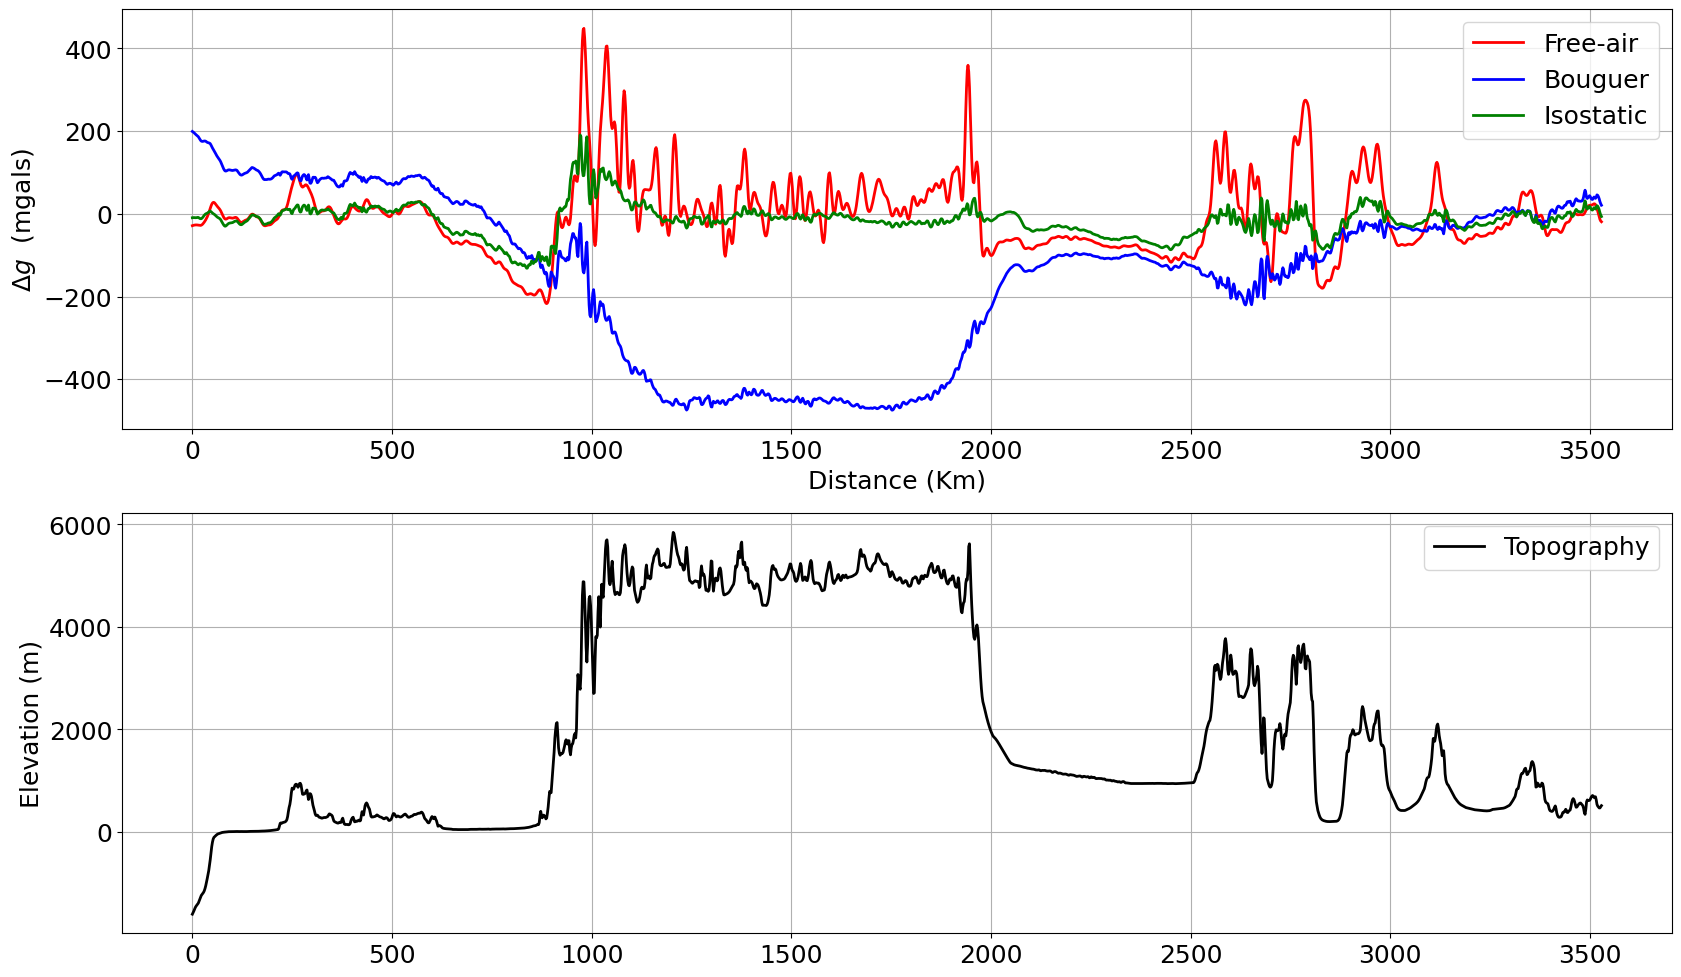

In [8]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    '''Distance between two points in a sphere'''
    #Radius of Earth (Km)
    R=6371
    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
    
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
    
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    
    # Compute spherical distance from spherical coordinates.
    
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
    
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*R

import math
import numpy as np
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs

# Set default font size for plots:
font = {'size'   : 18}
plt.rc('font',**font)

[lon,lat,FA,BA,IA,T]=np.loadtxt('Hymalayas_anomalies.dat',comments='#',delimiter='\t',unpack=True)

#Hymalayas
arc=distance_on_unit_sphere(lat[0], lon[0], lat[-1], lon[-1]) #Km
d=np.linspace(0,arc,len(lat))
plt.figure('Hymalayas',figsize=(20,12))
plt.subplot(2,1,1),plt.plot(d,FA,'r',lw=2,label='Free-air')
plt.subplot(2,1,1),plt.plot(d,BA,'b',lw=2,label='Bouguer')
plt.subplot(2,1,1),plt.plot(d,IA,'g',lw=2,label='Isostatic')
plt.subplot(2,1,1),plt.ylabel(r'$\Delta g$  (mgals)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2),plt.plot(d,T,'k',lw=2,label='Topography')
plt.subplot(2,1,2),plt.ylabel('Elevation (m)')
plt.grid(True)
plt.legend()
plt.show()


## The Andes

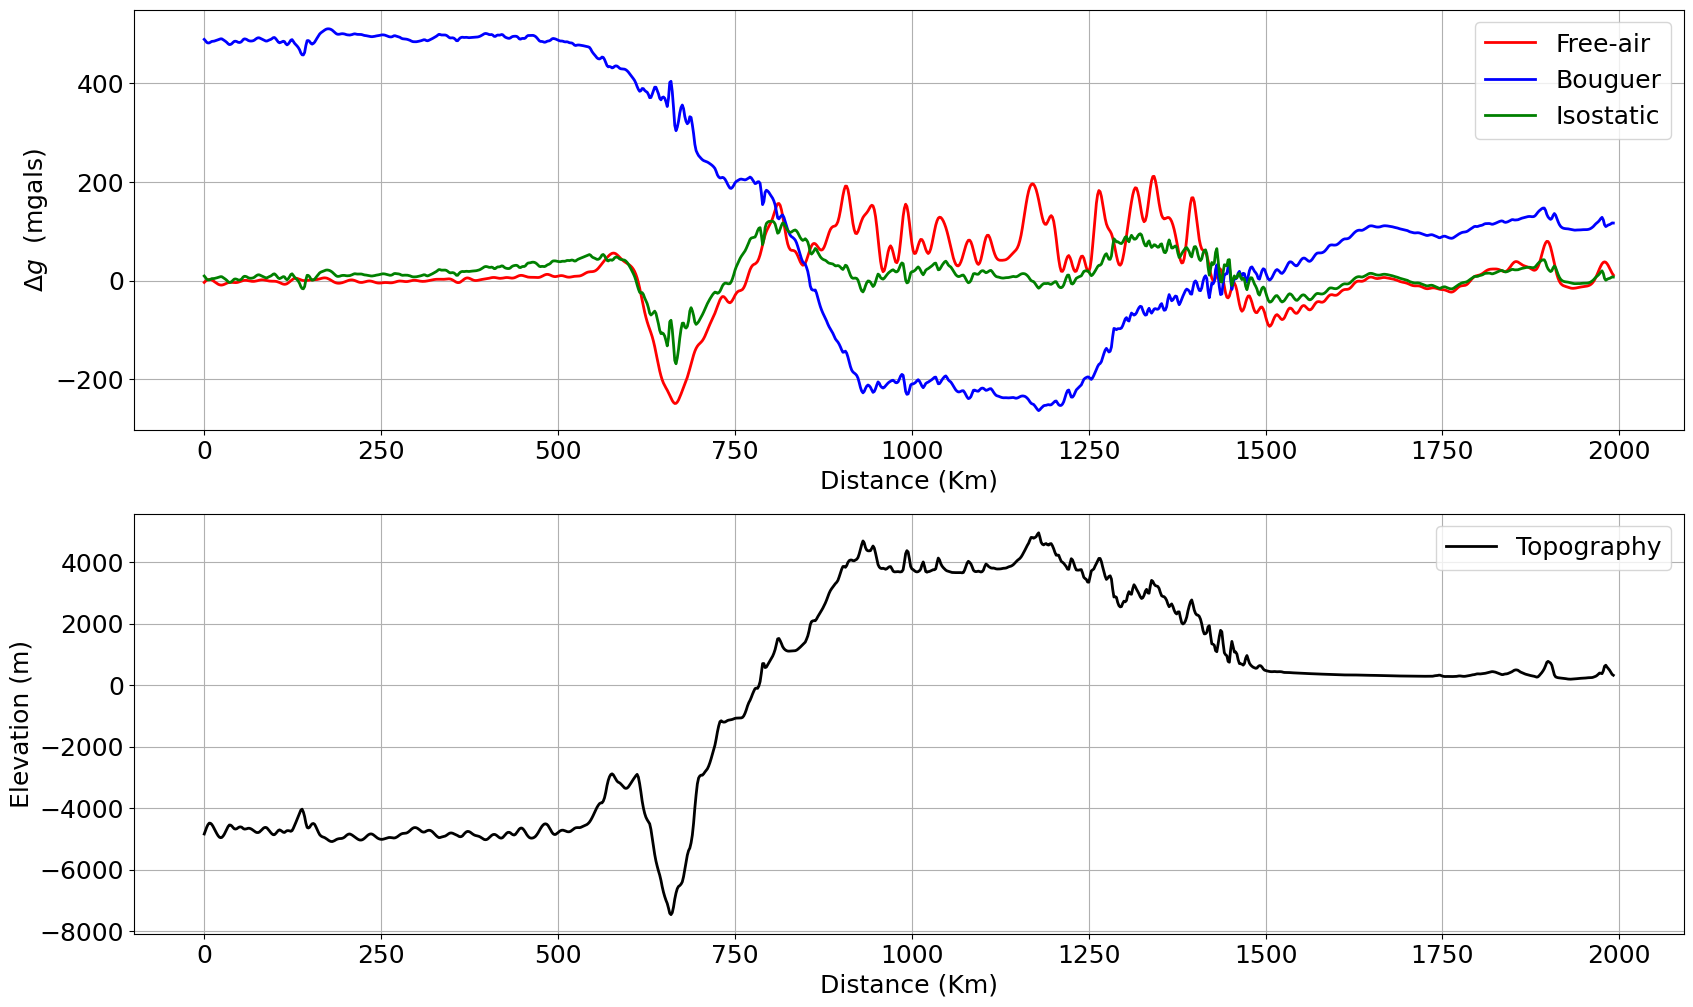

In [9]:
[lon,lat,FA,BA,IA,T]=np.loadtxt('Andes_anomalies.dat',comments='#',delimiter='\t',unpack=True)
arc=distance_on_unit_sphere(lat[0], lon[0], lat[-1], lon[-1]) #Km
d=np.linspace(0,arc,len(lat))
plt.figure('Andes',figsize=(20,12))
plt.subplot(2,1,1),plt.plot(d,FA,'r',lw=2,label='Free-air')
plt.subplot(2,1,1),plt.plot(d,BA,'b',lw=2,label='Bouguer')
plt.subplot(2,1,1),plt.plot(d,IA,'g',lw=2,label='Isostatic')
plt.subplot(2,1,1),plt.ylabel(r'$\Delta g$  (mgals)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2),plt.plot(d,T,'k',lw=2,label='Topography')
plt.subplot(2,1,2),plt.ylabel('Elevation (m)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.show()

## Mid-Atlantic Ocean Rift

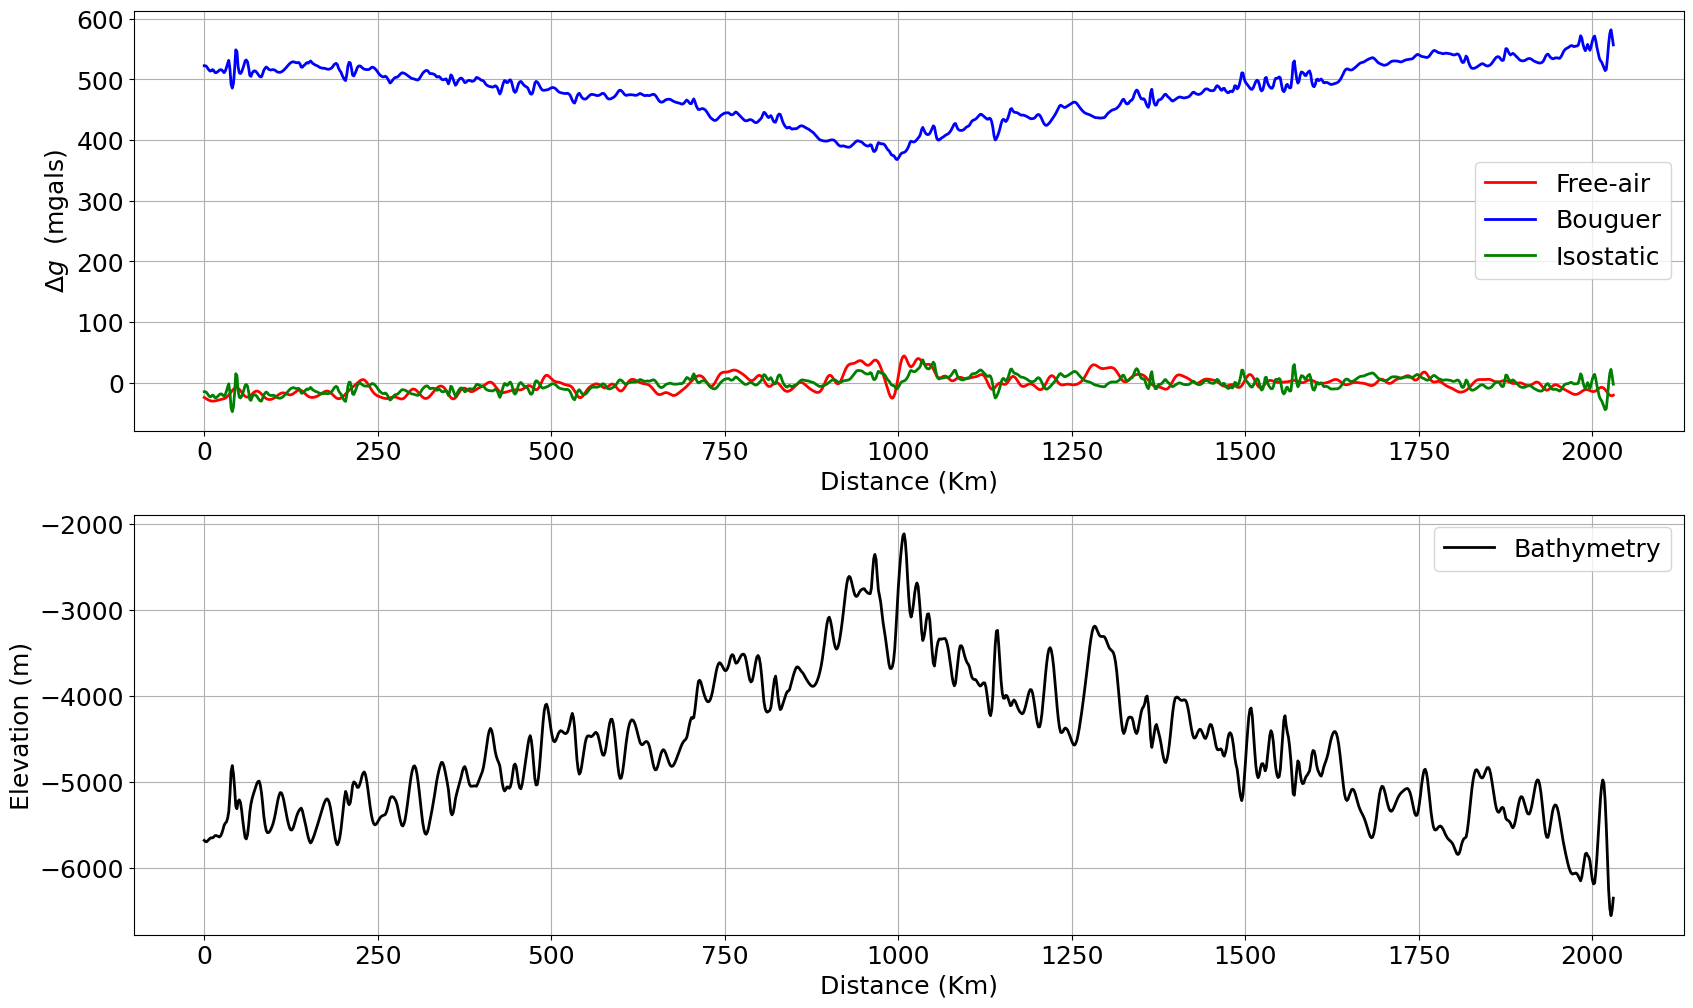

In [10]:
[lon,lat,FA,BA,IA,T]=np.loadtxt('Mid_Atlantic_anomalies.dat',comments='#',delimiter='\t',unpack=True)
arc=distance_on_unit_sphere(lat[0], lon[0], lat[-1], lon[-1]) #Km
d=np.linspace(0,arc,len(lat))
plt.figure('Mid_Atlantic',figsize=(20,12))
plt.subplot(2,1,1),plt.plot(d,FA,'r',lw=2,label='Free-air')
plt.subplot(2,1,1),plt.plot(d,BA,'b',lw=2,label='Bouguer')
plt.subplot(2,1,1),plt.plot(d,IA,'g',lw=2,label='Isostatic')
plt.subplot(2,1,1),plt.ylabel(r'$\Delta g$  (mgals)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2),plt.plot(d,T,'k',lw=2,label='Bathymetry')
plt.subplot(2,1,2),plt.ylabel('Elevation (m)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.show()

## The Taranaki Basin 

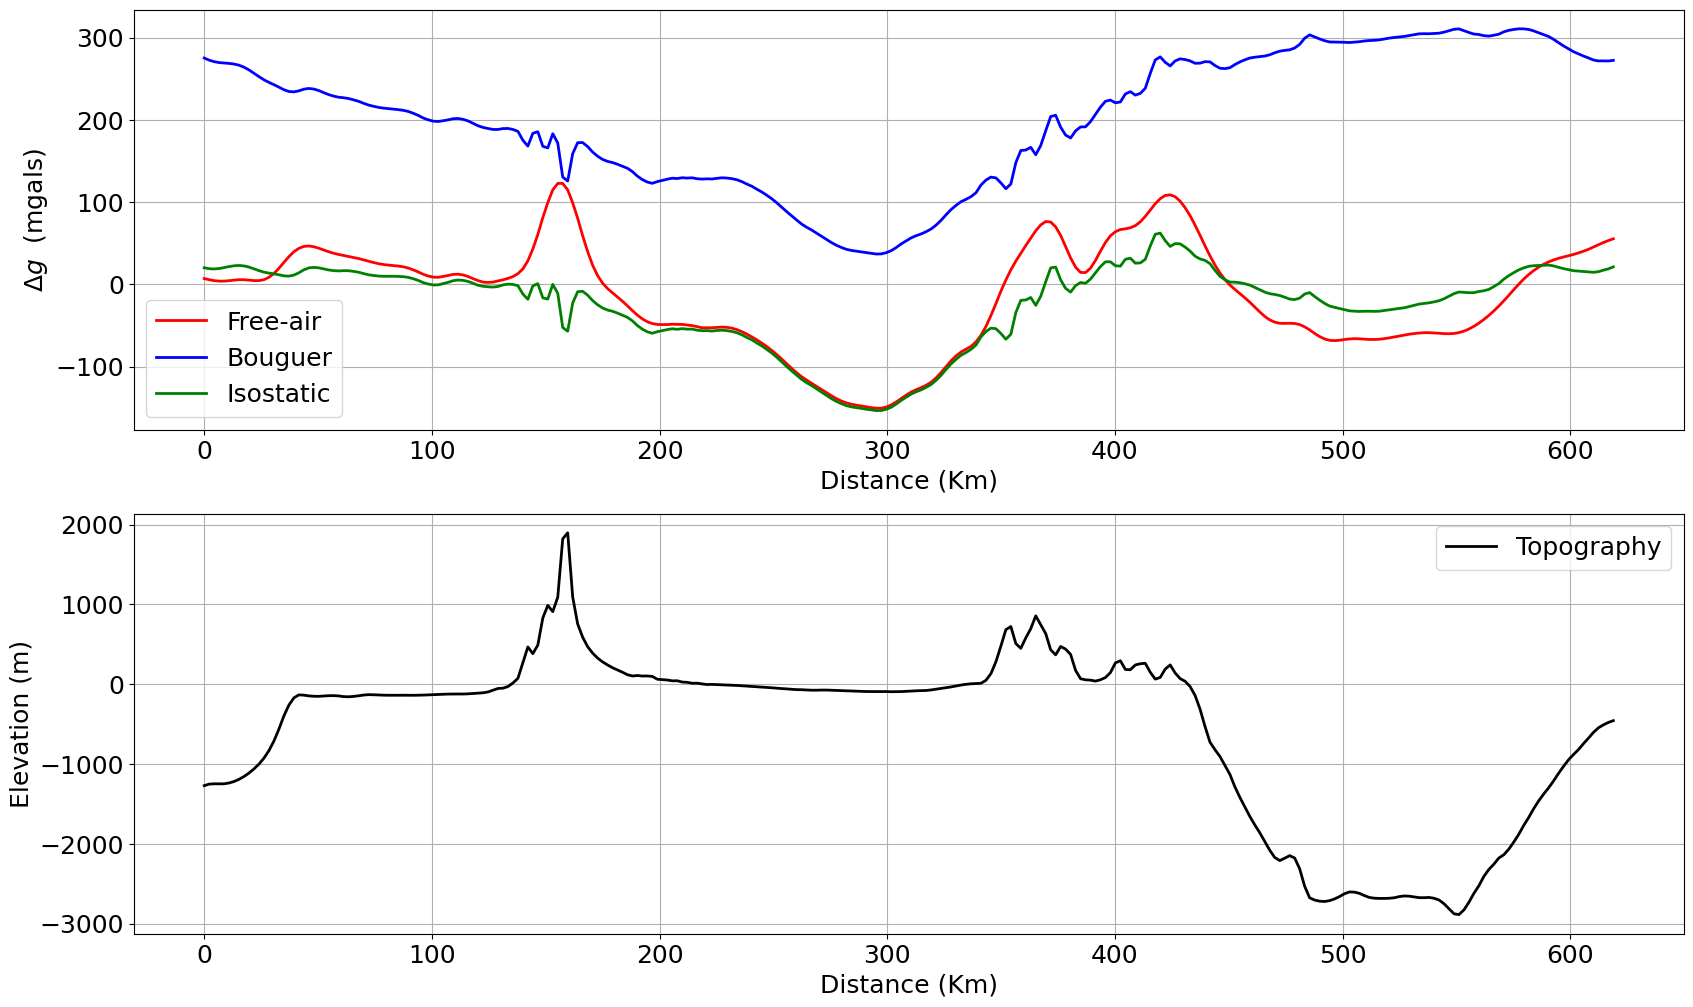

In [11]:
[lon,lat,FA,BA,IA,T]=np.loadtxt('Hauraki_anomalies.dat',comments='#',delimiter='\t',unpack=True)
arc=distance_on_unit_sphere(lat[0], lon[0], lat[-1], lon[-1]) #Km
d=np.linspace(0,arc,len(lat))
plt.figure('Hauraki',figsize=(20,12))
plt.subplot(2,1,1),plt.plot(d,FA,'r',lw=2,label='Free-air')
plt.subplot(2,1,1),plt.plot(d,BA,'b',lw=2,label='Bouguer')
plt.subplot(2,1,1),plt.plot(d,IA,'g',lw=2,label='Isostatic')
plt.subplot(2,1,1),plt.ylabel(r'$\Delta g$  (mgals)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2),plt.plot(d,T,'k',lw=2,label='Topography')
plt.subplot(2,1,2),plt.ylabel('Elevation (m)'),plt.xlabel('Distance (Km)')
plt.grid(True)
plt.legend()
plt.show()